In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as plot
from pyspark.sql.functions import col
import pandas as pd
import numpy as np

spark = SparkSession.builder.appName('abc').getOrCreate()

df=spark.read.csv('USvideos.csv',header=True)
df.show()

+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|   video_id|trending_date|               title|       channel_title|category_id|        publish_time|                tags|  views| likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|
+-----------+-------------+--------------------+--------------------+-----------+--------------------+--------------------+-------+------+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+
|2kyS6SvSYSE|     17.14.11|WE WANT TO TALK A...|        CaseyNeistat|         22|2017-11-13T17:13:...|     SHANtell martin| 748374| 57527|    2966|        15954|https://i.ytimg.c...|            False|           Fal

<Container object of 10 artists>

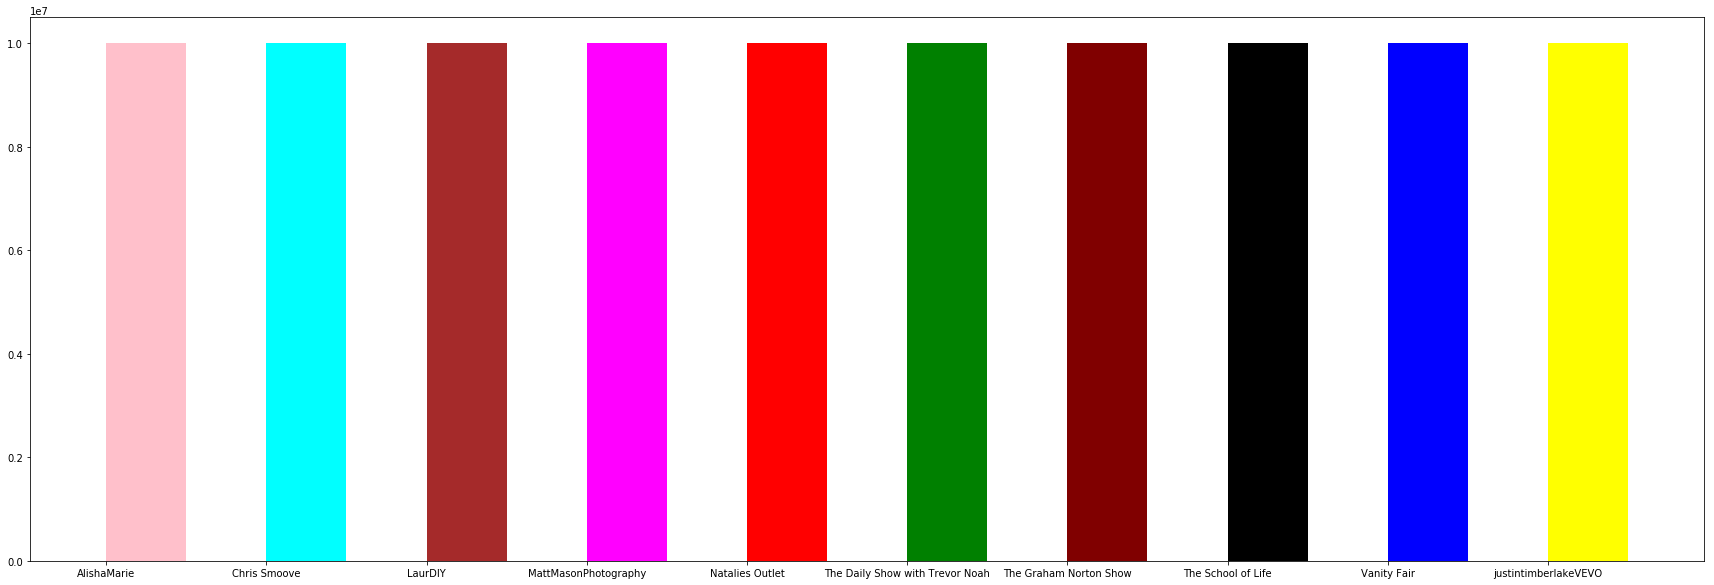

In [3]:

df.createOrReplaceTempView("videos")
df1 = spark.sql("select channel_title, views from videos order by views DESC limit 10")
df1 = df1.orderBy('views', ascending=False)
views = df1.select("views").rdd.flatMap(lambda x: x).collect()
title = df1.select("channel_title").rdd.flatMap(lambda x: x).collect()
views_new =[]
dict_one = {}
for i in range(len(views)):
    key = str(views[i])
    if len(key) == 4:
        key = key + '000' 
    elif len(key) == 5:
        key = key + '00'
    elif len(key) == 6:
        key = key + '0'
    new_key = int(key)
    views_new.append(new_key)
    
for i in range(len(views_new)):
    dict_one[title[i]] = views_new[i]
    

plt.figure(figsize=(30, 10))  # width:20, height:3
plt.bar(dict_one.keys(), dict_one.values(), align='edge', width=0.5,color=['red','blue','yellow','cyan','green','magenta','pink','maroon','black','brown'])

{'>5000': 4841, '> 20000': 1093, '> 25000': 830, '>10000': 2472, '> 15000': 1533}


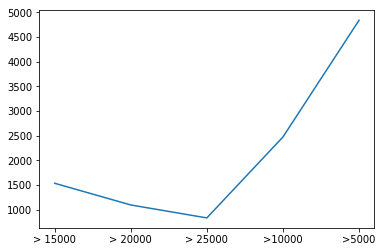

In [5]:
import pyspark.sql.functions as f
width = 1.0 
from pywaffle import Waffle


df2 = spark.sql("select dislikes from videos where dislikes > 100 and dislikes <= 300000 limit 100000")
list1 = df2.filter(df2.dislikes > 5000)
list2 = df2.filter(df2.dislikes > 10000)
list3 = df2.filter(df2.dislikes > 15000)
list4 = df2.filter(df2.dislikes > 20000)
list5 = df2.filter(df2.dislikes > 25000)
dislikes= {'>5000': list1.count(), '>10000': list2.count(), '> 15000': list3.count(),'> 25000': list5.count(), '> 20000': list4.count()}
keys = dislikes.keys()
vals = dislikes.values()
print(dislikes)

lists = sorted(dislikes.items())
x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.figure(figsize=(20, 3)) 
plt.show()






In [4]:
from collections import Counter
category_id_mapping = {2:'Autos & Vehicles',1:'Film & Animation',
                  10:'Music',15:'Pets & Animals',17:'Sports',
                 19:'Travel & Events',20:'Gaming',22:'People & Blogs',
                 23:'Comedy',24:'Entertainment',25:'News & Politics',
                 26:'Howto & Style',27:'Education',28:'Science & Technology',
                  29:'Nonprofits & Activism',43:'Shows'}
category_dict = {}
                
                 
df_categories = spark.sql("select category_id from videos where category_id > 1 and category_id < 50")
categories = df_categories.select("category_id").rdd.flatMap(lambda x: x).collect()
count =  Counter(categories)
for key,value in count.items():
    val = int(key)
    foo = int(value)
    category = category_id_mapping[val]
    category_dict[category] = foo

plt.rcParams["patch.force_edgecolor"] = True
plt.barh(category_dict.keys(), category_dict.values(), width, color='gold')
plt.show()





    


    


NameError: name 'width' is not defined

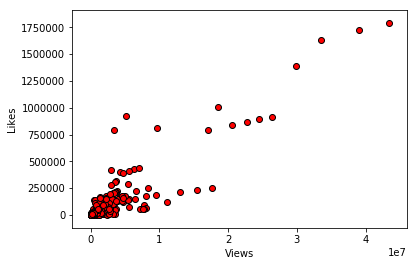

In [28]:
df_scatter = spark.sql("select views,likes from videos where views >10 and views < 1000000000 and likes > 10 and likes <1000000000 limit 1000")
scatter_dict = {}
likes = df_scatter.select("likes").rdd.flatMap(lambda x: x).collect()
views = df_scatter.select("views").rdd.flatMap(lambda x: x).collect()
#print(likes)
#print(views)
count = 0
for i in range(len(likes)):
    count += 1
    if count > 10000:
        break
    else:
        scatter_dict[views[i]] = likes[i]

fig, ax = plt.subplots()
ax.set_xlabel("Views")
ax.set_ylabel("Likes")
for x,y in scatter_dict.items():
    key = int(x)
    value = int(y)
    plt.scatter(key,value,color="red", edgecolors="#000000")
plt.show()



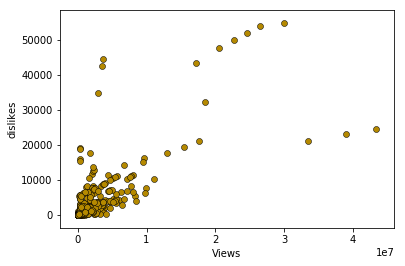

In [5]:
df_scatter = spark.sql("select views,dislikes from videos where views >10 and views < 1000000000 and dislikes > 10 and dislikes <1000000000 limit 1000")
scatter_dict = {}
dislikes = df_scatter.select("dislikes").rdd.flatMap(lambda x: x).collect()
views = df_scatter.select("views").rdd.flatMap(lambda x: x).collect()
#print(likes)
#print(views)
count = 0
for i in range(len(dislikes)):
    count += 1
    if count > 10000:
        break
    else:
        scatter_dict[views[i]] = dislikes[i]

fig, ax = plt.subplots()
ax.set_xlabel("Views")
ax.set_ylabel("dislikes")
for x,y in scatter_dict.items():
    key = int(x)
    value = int(y)
    plt.scatter(key,value,color="#b58900", linewidths=0.5, edgecolors="#000000")
plt.show()

/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1999: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



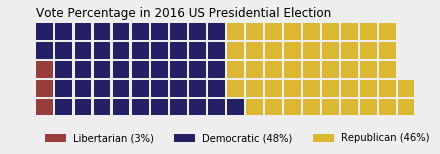

In [36]:
data = {'Democratic': 48, 'Republican': 46, 'Libertarian': 3}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=("#983D3D", "#232066", "#DCB732"),
    title={'label': 'Vote Percentage in 2016 US Presidential Election', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
)
fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#EEEEEE')
plt.show()

In [ ]:
import pyspark.sql.functions as f
width = 1.0 
from pywaffle import Waffle

df_likes = spark.sql("select likes from videos where likes > 10000 and likes < 1000000 limit 100000")
df_likes.show()
